###  Predicting Airbnb Listing Prices in Melbourne, Australia__

---
---

In [131]:

import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [136]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            7000 non-null   int64  
 1   source                                        7000 non-null   object 
 2   name                                          6999 non-null   object 
 3   description                                   6943 non-null   object 
 4   neighborhood_overview                         5177 non-null   object 
 5   host_name                                     7000 non-null   object 
 6   host_since                                    7000 non-null   object 
 7   host_location                                 5720 non-null   object 
 8   host_about                                    4730 non-null   object 
 9   host_response_time                            7000 non-null   o

In [137]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3000 non-null   int64  
 1   source                                        3000 non-null   object 
 2   name                                          3000 non-null   object 
 3   description                                   2969 non-null   object 
 4   neighborhood_overview                         1576 non-null   object 
 5   host_name                                     3000 non-null   object 
 6   host_since                                    3000 non-null   object 
 7   host_location                                 2230 non-null   object 
 8   host_about                                    1559 non-null   object 
 9   host_response_time                            2263 non-null   o

### **4. Missing Values**

Both the training and testing datasets contain missing values, with very similar patterns across several key variables. These missing values primarily appear in descriptive fields, location-related fields, and review-related information.

---

**Common Missing Value Patterns (in both train and test sets):**

1. **Descriptive Information (optional/free-text):**  
   - `description`, `neighborhood_overview`, `host_location`, `host_about`, `host_neighbourhood`  
   → These are optional fields that hosts often leave blank, resulting in frequent missing values.

2. **Geographic Information:**  
   - `neighbourhood`, `neighbourhood_cleansed`  
   → Missing data here may be due to incomplete location entry or geocoding errors.

3. **Property Information:**  
   - `property_type`, `room_type`, `bathrooms`, `bedrooms`, `beds`  
   → These may be missing due to hosts skipping or inputting inconsistent property details.

4. **Calendar Availability:**  
   - `availability_365`, `minimum_minimum_nights`, `maximum_maximum_nights`  
   → These values are sometimes missing for listings without fully configured availability calendars.

5. **Review Scores:**  
   - All fields beginning with `review_scores_` (e.g., `review_scores_rating`, `review_scores_cleanliness`, etc)  
   → Listings with no guest reviews lack review score data, which is expected behavior.

6. **Acceptance Rate:**  
   - `host_acceptance_rate`  
   → May be missing if the host is new or has not received enough booking requests.

---

**Minor Differences:**

- Fields such as `first_review`, `last_review`, `host_response_time`, and `reviews_per_month` show only missing values in the test set, likely because the test data includes newer listings that haven't received reviews or inquiries yet.


**Additional Insight: Missing Review Scores**

In the training dataset, each of the review score fields — such as:

- `review_scores_accuracy`  
- `review_scores_cleanliness`  
- `review_scores_checkin`  
- `review_scores_communication`  
- `review_scores_location`  
- `review_scores_value`

has 6978 non-null values out of 7000 total records, indicating that 22 listings (or guests) did not receive detailed review scores.

This pattern is also observed in the test dataset, suggesting that some guests leave overall feedback but skip individual review components. 


### **5. Some interesting univariate data characteristics**

       accommodates  minimum_nights  review_scores_rating     bedrooms
count   7000.000000     7000.000000           7000.000000  6622.000000
mean       3.839714        4.316000              4.712247     1.785865
std        2.514657       17.898345              0.445324     1.056360
min        1.000000        1.000000              0.000000     1.000000
25%        2.000000        1.000000              4.640000     1.000000
50%        4.000000        2.000000              4.825000     1.000000
75%        5.000000        3.000000              4.930000     2.000000
max       16.000000     1125.000000              5.000000    14.000000


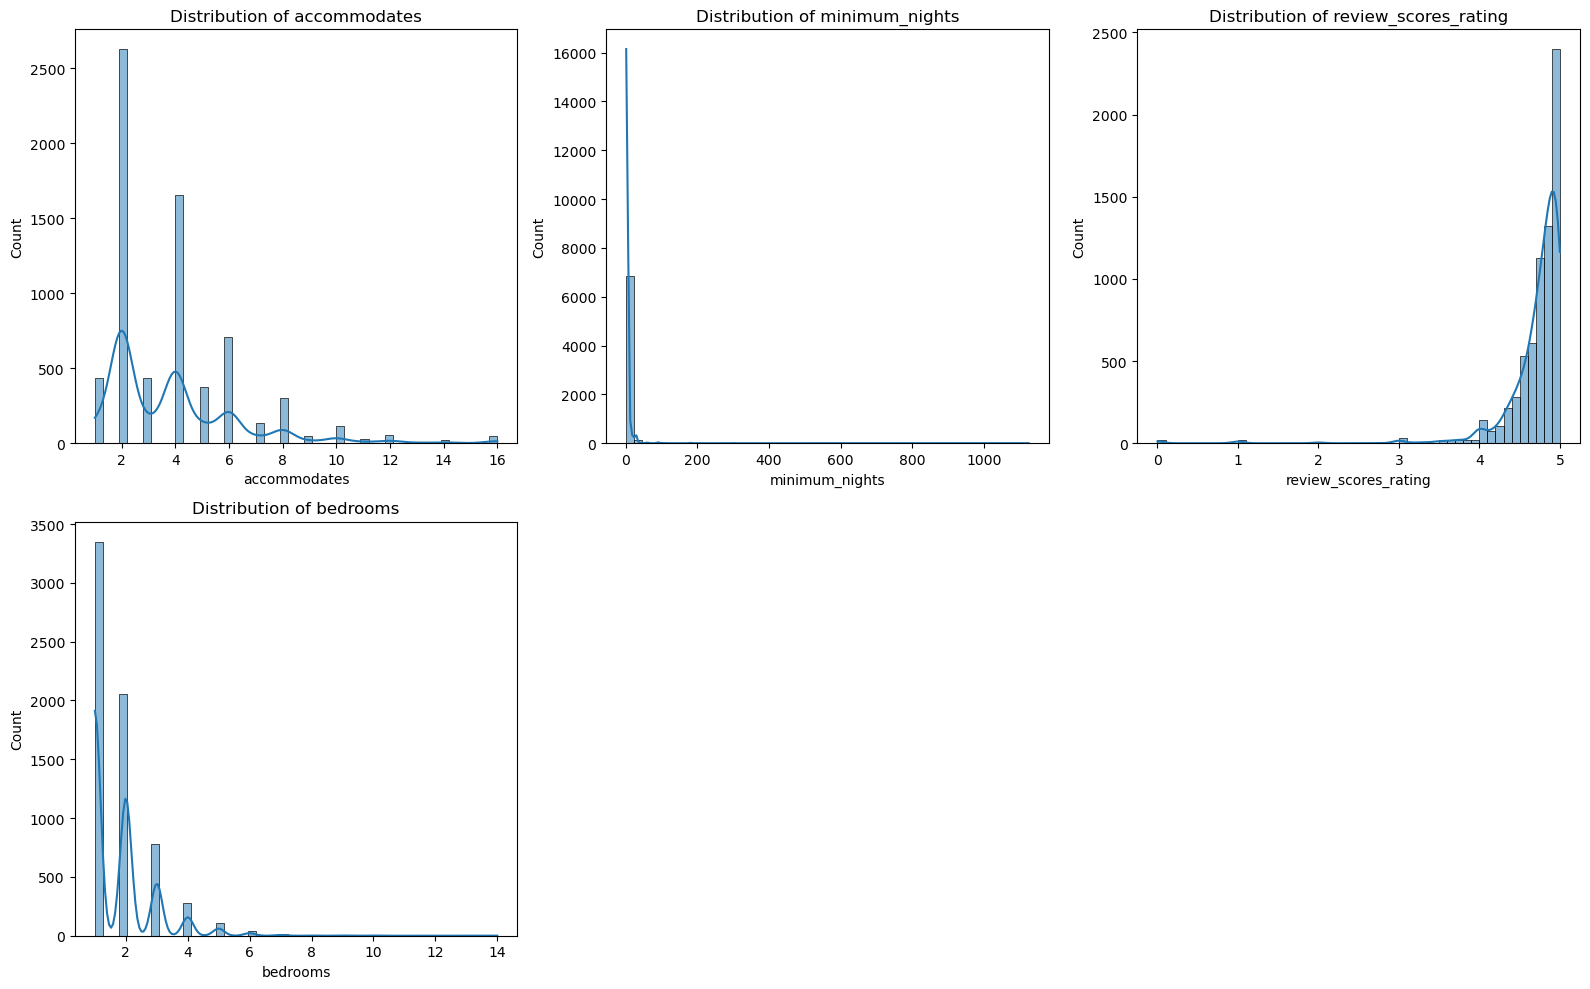

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key variables for univariate analysis
features = ['accommodates', 'minimum_nights', 
            'review_scores_rating', 'bedrooms']

# Display summary statistics
print(train_df[features].describe())

# Set up plots
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_df[feature].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

I explored some key numerical features in the training dataset to understand their distribution, detect anomalies, and gain insights for preprocessing.

---

 **1. Price (Target Variable)**
- **Mean:** 285.65 | **Median:** 172 | **Max:** 145,160 AUD
- **Highly right-skewed distribution** with extreme outliers (e.g., luxury listings or data errors).
- The large gap between the mean and median suggests that **log transformation** or **outlier treatment** may be necessary.

---

**2. Accommodates**
- **Mean:** 3.84 | **Median:** 4 | **Max:** 16
- Most listings are designed for small groups (2–4 guests).
- Larger listings (10+ people) exist but are rare and may need special handling.

---

**3. Minimum Nights**
- **Mean:** 4.32 | **Median:** 2 | **Max:** 1125
- The majority of listings have short minimum stays, but a few enforce **very high minimums**, skewing the distribution.
- These extreme values may represent **long-term rentals** and should be reviewed for outlier impact.

---

**4. Review Scores Rating**
- **Mean:** 4.71 | **Median:** 4.83 | **Max:** 5
- Ratings are **clustered near the maximum**, showing strong guest satisfaction.
- This tight range may limit variance for predictive power, but missing or zero values (min = 0) should be **investigated and cleaned**.

---

 **5. Bedrooms**
- **Mean:** 1.79 | **Median:** 1 | **Max:** 14
- Most listings offer 1–2 bedrooms.
- Listings with 10+ bedrooms are unusual and could indicate **shared spaces** or **uncommon property types**.
- Note: **Missing values** (~378 entries) may require imputation or separate flag variables.

---

These statistics highlight important preprocessing steps like **outlier removal**, **missing value handling**, and **distribution normalization**, all of which are crucial for building a robust prediction model.


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering



In [146]:
## Task 2, Question 1 Code Here
cols_to_drop = ['neighborhood_overview', 'host_about', 'host_neighbourhood', 'neighbourhood','name','description','host_name','host_location']

train_cleaned = train_df.drop(columns=cols_to_drop)
test_cleaned = test_df.drop(columns=cols_to_drop)

print("Dataset size after dropping columns with more than 20% missing values:")
print(f"Train: {train_cleaned.shape}")
print(f"Test: {test_cleaned.shape}")

Dataset size after dropping columns with more than 20% missing values:
Train: (7000, 53)
Test: (3000, 52)


- Removed columns with more than 20% missing values to reduce noise and simplify the dataset. These columns were mostly text-heavy or sparsely filled (host_about, description, host_location), and would not contribute significantly to model performance. Dropping them helps improve model efficiency and reduces potential overfitting on irrelevant data.

In [148]:
# Convert price string to float
train_cleaned['price'] = train_cleaned['price'].replace(r'[\$,]', '', regex=True).astype(float)

- The price column was stored as a string with currency symbols and commas. So remove these characters using regular expressions and converted the result to a float.

In [150]:
# Convert host_response_time to ordinal scale
response_map = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

train_cleaned['host_response_time'] = train_cleaned['host_response_time'].map(response_map).fillna(0).astype(int)
test_cleaned['host_response_time'] = test_cleaned['host_response_time'].map(response_map).fillna(0).astype(int)


- The `host_response_time` column contained categorical strings indicating how fast a host typically responds. I mapped these categories to ordinal numeric values, with higher scores for faster responses. This enables models to treat faster response times as more favourable in a meaningful, ranked way.

In [152]:
# Convert % strings to float decimals
percent_cols = ['host_response_rate', 'host_acceptance_rate']
for col in percent_cols:
    train_cleaned[col] = train_cleaned[col].str.rstrip('%').astype(float) / 100
    test_cleaned[col] = test_cleaned[col].str.rstrip('%').astype(float) / 100
    
    train_cleaned[col] = train_cleaned[col].fillna(-1)
    test_cleaned[col] = test_cleaned[col].fillna(-1)

- Percentage-based features like `host_response_rate` were stored as strings. We removed the % symbol and divided the values by 100 to convert them into float decimals between 0 and 1. Missing values were filled with -1 to preserve dataset structure while signaling absence of data.

In [154]:
# Convert 'Half-bath', '1.5 shared bath', etc. into float
import re
import numpy as np

def convert_bathrooms_final(x):
    if pd.isna(x): return np.nan
    s = str(x).lower()
    if 'half-bath' in s: return 0.5
    match = re.search(r'[\d\.]+', s)
    return float(match.group()) if match else np.nan
train_cleaned['bathrooms'] = train_cleaned['bathrooms'].apply(convert_bathrooms_final)

train_cleaned['bathrooms'] = train_cleaned['bathrooms'].apply(convert_bathrooms_final)
test_cleaned['bathrooms'] = test_cleaned['bathrooms'].apply(convert_bathrooms_final)

bathrooms_median = train_cleaned['bathrooms'].median()

train_cleaned['bathrooms'] = train_cleaned['bathrooms'].fillna(bathrooms_median)
test_cleaned['bathrooms'] = test_cleaned['bathrooms'].fillna(bathrooms_median)

print(train_cleaned['bathrooms'].sort_values().unique())


[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  8.5  9.   9.5 10. ]


- The `bathrooms` column had inconsistent formats such as “1 shared bath”, “Half-bath”, etc. We created a function to extract numeric values using regular expressions, assigning 0.5 for half-baths. Missing values were replaced with the median number of bathrooms to maintain central tendency and avoid loss of data.

`Task 2, Question 1 Text Summary`

- To make sure the dataset is prepared for modelling, we cleaned and converted all numerical characteristics. These actions made it possible to use categorical time-based or percentage data as meaningful numerical inputs for machine learning algorithms, standardised inconsistent formats, and properly handled missing numbers.

In [158]:
## Task 2, Question 2 Code Here

# Interaction feature
train_cleaned['acc_bedrooms'] = train_cleaned['accommodates'] * train_cleaned['bedrooms']
test_cleaned['acc_bedrooms'] = test_cleaned['accommodates'] * test_cleaned['bedrooms']

train_cleaned['reviews_interaction'] = train_cleaned['reviews_per_month'] * train_cleaned['number_of_reviews_ltm']
test_cleaned['reviews_interaction'] = test_cleaned['reviews_per_month'] * test_cleaned['number_of_reviews_ltm']

- Created a new feature called `acc_bedrooms` by multiplying `accommodates` with `bedrooms`. This interaction term captures the potential guest density per room, which may influence pricing. Listings that accommodate many people with fewer bedrooms might be priced differently than those with more space per guest.

- Multiplied `reviews_per_month` with `number_of_reviews_ltm` to create a `reviews_interaction` feature. This provides a weighted sense of how active the listing is over time. Higher values can indicate both popularity and consistent guest feedback, which may correlate with quality and price.


In [160]:
import ast

# Text to count features
def count_amenities(x):
    if pd.isna(x):
        return 0
    try:
        # Convert JSON string to list
        items = ast.literal_eval(x)
        return len(items)
    except:
        # If not a valid JSON, count the commas
        return x.count(',') + 1

train_cleaned['amenities_count'] = train_cleaned['amenities'].apply(count_amenities)
test_cleaned['amenities_count'] = test_cleaned['amenities'].apply(count_amenities)

# drop the original amenities column
train_cleaned = train_cleaned.drop(columns=['amenities'])
test_cleaned = test_cleaned.drop(columns=['amenities'])

print(train_cleaned[['amenities_count']].head())

print(test_cleaned[['amenities_count']].head())


   amenities_count
0               38
1               57
2               21
3               13
4               48
   amenities_count
0               46
1               27
2               13
3               13
4               13


-  `amenities` column contains multiple items in a text format. We created a new feature, `amenities_count`, by counting the number of amenities listed per property. This transformation helps quantify the level of convenience or luxury provided by the listing.

- Also dropped the original amenities text column afterward to avoid redundancy and simplify the dataset.

In [162]:
import numpy as np

# Coordinates of Melbourne city center
center_lat, center_long = -37.8136, 144.9631

def haversine(lat1, lon1, lat2, lon2):
    # Function to calculate the Haversine distance between 2 points
    R = 6371  # Radius of the Earth (km)
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c

for df in [train_cleaned, test_cleaned]:
    df['distance_to_center'] = haversine(df['latitude'], df['longitude'], center_lat, center_long)

print(train_cleaned[['latitude', 'longitude', 'distance_to_center']].head())
print(test_cleaned[['latitude', 'longitude', 'distance_to_center']].head())

   latitude  longitude  distance_to_center
0 -37.82030  144.99016            2.490997
1 -37.76606  144.97951            5.479357
2 -37.90546  145.39447           39.223422
3 -37.82163  144.96672            0.947826
4 -38.05725  145.33936           42.695092
    latitude   longitude  distance_to_center
0 -37.861423  144.987549            5.734753
1 -37.860130  144.972300            5.236600
2 -37.804590  144.953250            1.323830
3 -37.805250  144.953420            1.259059
4 -37.803680  144.954980            1.313619


- Engineered a `distance_to_center` feature by calculating the Haversine distance from each property to Melbourne's city center using latitude and longitude. Distance from city center often influences price, as central locations tend to be more expensive.

In [164]:
# Calculate the average price for each neighbourhood in the training set
target_mean = train_cleaned.groupby('neighbourhood_cleansed')['price'].mean()

# Function to map average price to each neighbourhood
def target_encode_neigh(x):
    if x in target_mean.index:
        return target_mean.loc[x]
    else:
        return train_cleaned['price'].mean()  # Use overall average price if the neighbourhood is not found

# Apply the encoding to train and test sets
train_cleaned['neighbourhood_encoded'] = train_cleaned['neighbourhood_cleansed'].map(target_encode_neigh)
test_cleaned['neighbourhood_encoded'] = test_cleaned['neighbourhood_cleansed'].map(target_encode_neigh)

# Fill missing values if any
mean_price = train_cleaned['price'].mean()
train_cleaned['neighbourhood_encoded'] = train_cleaned['neighbourhood_encoded'].fillna(mean_price)
test_cleaned['neighbourhood_encoded'] = test_cleaned['neighbourhood_encoded'].fillna(mean_price)

# Drop the original neighbourhood column
train_cleaned = train_cleaned.drop(columns=['neighbourhood_cleansed'])
test_cleaned = test_cleaned.drop(columns=['neighbourhood_cleansed'])

print(train_cleaned[['neighbourhood_encoded']].head(10))
print(test_cleaned[['neighbourhood_encoded']].head(10))

   neighbourhood_encoded
0             353.306695
1             144.171053
2             349.385484
3             335.346266
4             285.649714
5             160.780347
6             263.867609
7             335.346266
8             165.966667
9             160.780347
   neighbourhood_encoded
0             263.867609
1             263.867609
2             335.346266
3             335.346266
4             335.346266
5             335.346266
6             335.346266
7             335.346266
8             144.171053
9             335.346266


- Applied target encoding to the `neighbourhood_cleansed` column. Instead of using one-hot encoding, which can result in too many sparse features, we replaced each neighborhood with its average price based on the training set. This allows the model to capture the price trend by location more effectively.

- Missing values were filled with the overall mean price, and the original column was dropped afterward.

`Task 2, Question 2 Text Summary`

- These transformations are essential for improving model performance, as they create numeric and interpretable features from raw or textual data, allowing the model to better learn from the patterns and relationships within the dataset.

In [168]:
## Task 2, Question 3 Code Here
print(train_cleaned[['accommodates', 'bedrooms', 'beds']].isnull().sum())
print(train_cleaned[['accommodates', 'bedrooms', 'beds']].describe())

accommodates      0
bedrooms        378
beds             72
dtype: int64
       accommodates     bedrooms         beds
count   7000.000000  6622.000000  6928.000000
mean       3.839714     1.785865     2.263568
std        2.514657     1.056360     1.783209
min        1.000000     1.000000     1.000000
25%        2.000000     1.000000     1.000000
50%        4.000000     1.000000     2.000000
75%        5.000000     2.000000     3.000000
max       16.000000    14.000000    22.000000


- To prepare the dataset for machine learning, we handled all missing values in both the training and testing datasets. This step is crucial for ensuring model robustness, as missing values can lead to biased or invalid predictions if left untreated.

In [170]:
# Median imputation for numeric columns
for col in ['bedrooms', 'beds']:
    median = train_cleaned[col].median()
    train_cleaned[col] = train_cleaned[col].fillna(median)
    test_cleaned[col] = test_cleaned[col].fillna(median)
print(train_cleaned[['bedrooms', 'beds']].isnull().sum())

bedrooms    0
beds        0
dtype: int64


In [171]:
train_cleaned['acc_bedrooms'] = train_cleaned['accommodates'] * train_cleaned['bedrooms']
test_cleaned['acc_bedrooms'] = test_cleaned['accommodates'] * test_cleaned['bedrooms']
# add lại để sửa ạldhekfbjbce

- Started by identifying missing values in important numerical columns. Since the distributions of bedrooms and beds are slightly skewed, we used the **median** to fill in missing values. **Median** imputation is less sensitive to outliers compared to the mean, ensuring a more robust approach.

In [173]:
print(train_cleaned['room_type'].value_counts(dropna=False))
print(f"Missing values: {train_cleaned['room_type'].isnull().sum()}")

room_type
Entire home/apt    5419
Private room       1367
NaN                 134
Hotel room           45
Shared room          35
Name: count, dtype: int64
Missing values: 134


In [174]:
# Mode imputation for categorical
mode_room_type = train_cleaned['room_type'].mode()[0]
train_cleaned['room_type'] = train_cleaned['room_type'].fillna(mode_room_type)
test_cleaned['room_type'] = test_cleaned['room_type'].fillna(mode_room_type)

- For the categorical feature room_type, we used mode imputation. This fills in missing values with the most frequent category. In this case, it helps retain consistency with the most common room type listed by hosts.

In [176]:
# Date-related column imputation
review_cols = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

for col in review_cols:
    mean_value = train_cleaned[col].mean()
    train_cleaned[col] = train_cleaned[col].fillna(mean_value)
    test_cleaned[col] = test_cleaned[col].fillna(mean_value)

print(train_cleaned[review_cols].isnull().sum())
print(test_cleaned[review_cols].isnull().sum())

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64


- The review scores (`review_scores_rating`, `review_scores_accuracy`, ...) are numeric but reflect user feedback. For these columns, using **mean** imputation to reflect the general sentiment among guests. This preserves the numeric nature of the data while approximating user feedback.

In [178]:
 num_cols = [
    'host_listings_count',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'minimum_nights',
    'maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'reviews_per_month'
]

for col in num_cols:
    median_val = train_cleaned[col].median()
    train_cleaned[col] = train_cleaned[col].fillna(median_val)
    test_cleaned[col] = test_cleaned[col].fillna(median_val)

- Next, we handled other numerical columns with missing data, such as availability and review counts. Again, using **median** imputation due to potential outliers and variability in host behavior.

In [180]:
import pandas as pd

# Calculating missing train
missing_train = train_cleaned.isnull().sum().reset_index()
missing_train.columns = ['feature', 'missing_train']
missing_train = missing_train[missing_train['missing_train'] > 0].sort_values(by='missing_train', ascending=False)

# Calculating missing test
missing_test = test_cleaned.isnull().sum().reset_index()
missing_test.columns = ['feature', 'missing_test']
missing_test = missing_test[missing_test['missing_test'] > 0].sort_values(by='missing_test', ascending=False)

# merge the result
missing_summary = pd.merge(missing_train, missing_test, on='feature', how='outer').fillna(0).sort_values(by=['missing_train', 'missing_test'], ascending=False)


- Finally, calculated and displayed missing values across both datasets. This provided visibility into which features had been affected and confirmed that all missing values were handled.

`Task 2, Question 3 Text Summary`

- To handle all missing values across numerical and categorical features using appropriate imputation methods—median for skewed numeric data, mean for review-related scores, and mode for categorical variables—to ensure data completeness and model reliability.

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately.  
(2 marks)

In [184]:
## Task 2, Question 4 Code Here
# One-hot encode source
train_cleaned = pd.get_dummies(train_cleaned, columns=['source'], prefix='source')
test_cleaned = pd.get_dummies(test_cleaned, columns=['source'], prefix='source')

train_cleaned, test_cleaned = train_cleaned.align(test_cleaned, join='left', axis=1, fill_value=0)

In [185]:
# One-hot encode room_type
train_cleaned = pd.get_dummies(train_cleaned, columns=['room_type'], prefix='room')
test_cleaned = pd.get_dummies(test_cleaned, columns=['room_type'], prefix='room')

train_cleaned, test_cleaned = train_cleaned.align(test_cleaned, join='left', axis=1, fill_value=0)

# convert to 0/1 numerical format 
for col in train_cleaned.filter(like='room_').columns:
    train_cleaned[col] = train_cleaned[col].astype(int)

for col in test_cleaned.filter(like='room_').columns:
    test_cleaned[col] = test_cleaned[col].astype(int)

print(train_cleaned.filter(like='room_').head(5))

   room_Entire home/apt  room_Hotel room  room_Private room  room_Shared room
0                     1                0                  0                 0
1                     0                0                  1                 0
2                     1                0                  0                 0
3                     0                0                  1                 0
4                     1                0                  0                 0


- Applied one-hot encoding to transform the categorical features `source` and `room_type` into binary indicator columns. This ensures that the model does not assume any ordinal relationship between categories. We also aligned the train and test sets to ensure consistent columns.

In [187]:
# Simplify property_type
def simplify_property_type(x):
    if pd.isna(x):
        return 'Other'
    x = x.lower()
    if x.startswith('entire'):
        return 'Entire home/apt'
    elif x.startswith('private room'):
        return 'Private room'
    elif x.startswith('shared room'):
        return 'Shared room'
    else:
        return 'Other'
        
train_cleaned['property_type_simple'] = train_cleaned['property_type'].apply(simplify_property_type)
test_cleaned['property_type_simple'] = test_cleaned['property_type'].apply(simplify_property_type)

train_cleaned['property_type_simple'] = train_cleaned['property_type_simple'].fillna('Other')
test_cleaned['property_type_simple'] = test_cleaned['property_type_simple'].fillna('Other')

print(train_cleaned['property_type_simple'].value_counts())

property_type_simple
Entire home/apt    5344
Private room       1309
Other               313
Shared room          34
Name: count, dtype: int64


- The `property_type` feature contains many distinct values. To reduce dimensionality and improve model generalization, we grouped them into three simplified categories: `Entire home/apt`, `Private room`, and `Shared room`. All other property types were grouped under `Other`. This strategy helps retain essential variation while reducing noise from rare categories.

In [189]:
# One-Hot Encoding Simplified Property Types
train_cleaned = pd.get_dummies(train_cleaned, columns=['property_type_simple'], prefix='property')
test_cleaned = pd.get_dummies(test_cleaned, columns=['property_type_simple'], prefix='property')

train_cleaned, test_cleaned = train_cleaned.align(test_cleaned, join='left', axis=1, fill_value=0)

property_cols = [col for col in train_cleaned.columns if col.startswith('property_')]
print(train_cleaned[property_cols].head())

property_cols = [col for col in train_cleaned.columns if col.startswith('property_') and col != 'property_type']

for col in property_cols:
    train_cleaned[col] = train_cleaned[col].astype(int)
    test_cleaned[col] = test_cleaned[col].astype(int)

print(train_cleaned[property_cols].head())
# drop the original column
train_cleaned = train_cleaned.drop(columns=['property_type'], errors='ignore')
test_cleaned = test_cleaned.drop(columns=['property_type'], errors='ignore')


                 property_type  property_Entire home/apt  property_Other  \
0            Entire guesthouse                      True           False   
1  Private room in rental unit                     False           False   
2           Entire rental unit                      True           False   
3  Private room in rental unit                     False           False   
4           Entire rental unit                      True           False   

   property_Private room  property_Shared room  
0                  False                 False  
1                   True                 False  
2                  False                 False  
3                   True                 False  
4                  False                 False  
   property_Entire home/apt  property_Other  property_Private room  \
0                         1               0                      0   
1                         0               0                      1   
2                         1            

- After simplifying the `property_type`, we one-hot encoded the new `property_type_simple` variable. This allows the model to interpret each property type independently without assuming any hierarchy or sequence.

In [191]:
# Encode boolean variables
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']

for col in bool_cols:
    train_cleaned[col] = train_cleaned[col].map({'t':1, 'f':0})
    test_cleaned[col] = test_cleaned[col].map({'t':1, 'f':0})

    # If still have missing value, fill in o or suitable value
    train_cleaned[col] = train_cleaned[col].fillna(0).astype(int)
    test_cleaned[col] = test_cleaned[col].fillna(0).astype(int)

print(train_cleaned[bool_cols].head())
print(test_cleaned[bool_cols].head())

   host_is_superhost  host_has_profile_pic  host_identity_verified  \
0                  0                     1                       1   
1                  0                     1                       1   
2                  1                     1                       1   
3                  0                     1                       1   
4                  1                     1                       1   

   instant_bookable  has_availability  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  
   host_is_superhost  host_has_profile_pic  host_identity_verified  \
0                  1                     1                       1   
1                  0                     1                       1   
2                  0                     1                       1   
3                  0                     1                 

- Converted boolean string fields such as `host_is_superhost`, `host_has_profile_pic`, and `instant_bookable` from 't'/'f' to binary 1/0 values. Any missing values were filled with 0 to avoid losing rows or introducing bias.

`Task 2, Question 4 Text Summary`

- By converting all categorical and boolean features to numerical format, it ensured compatibility with machine learning models and preserved as much information as possible from the original dataset.

**Task 2, Question 5**: Perform any additional data preparation steps you consider necessary before building your predictive models, and clearly explain each action you take.  
(1 mark)

In [195]:
## Task 2, Question 5 Code Here

for col in ['host_since', 'first_review', 'last_review']:
    print(f"--- {col} ---")
    print(train_cleaned[col].head())
    print(train_cleaned[col].dtype)

--- host_since ---
0     16/3/2013
1     16/9/2009
2    28/11/2011
3     13/6/2010
4     12/7/2010
Name: host_since, dtype: object
object
--- first_review ---
0     29/3/2013
1     12/1/2013
2      6/7/2015
3    16/10/2011
4    24/11/2010
Name: first_review, dtype: object
object
--- last_review ---
0    18/2/2023
1     8/3/2023
2    13/6/2022
3    27/1/2012
4     3/3/2023
Name: last_review, dtype: object
object


In [196]:
for col in ['host_since', 'first_review', 'last_review']:
    train_cleaned[col] = pd.to_datetime(train_cleaned[col], dayfirst=True, errors='coerce')
    test_cleaned[col] = pd.to_datetime(test_cleaned[col], dayfirst=False, errors='coerce')

for col in ['host_since', 'first_review', 'last_review']:
    print(f"--- {col} after conversion ---")
    print(train_cleaned[col].head())
    print(train_cleaned[col].dtype)

--- host_since after conversion ---
0   2013-03-16
1   2009-09-16
2   2011-11-28
3   2010-06-13
4   2010-07-12
Name: host_since, dtype: datetime64[ns]
datetime64[ns]
--- first_review after conversion ---
0   2013-03-29
1   2013-01-12
2   2015-07-06
3   2011-10-16
4   2010-11-24
Name: first_review, dtype: datetime64[ns]
datetime64[ns]
--- last_review after conversion ---
0   2023-02-18
1   2023-03-08
2   2022-06-13
3   2012-01-27
4   2023-03-03
Name: last_review, dtype: datetime64[ns]
datetime64[ns]


- Started by inspecting the date columns to confirm their data type. They were initially stored as text (object type), which cannot be used for time-based analysis. Then converted them into proper datetime format using pd.to_datetime(), ensuring compatibility with time calculations. The errors='coerce' argument was used to safely convert invalid entries to NaT.

In [198]:
from datetime import datetime

reference_date = pd.to_datetime(datetime.today().date())

for col in ['host_since', 'first_review', 'last_review']:
    train_cleaned[col + '_days_since'] = (reference_date - train_cleaned[col]).dt.days
    test_cleaned[col + '_days_since'] = (reference_date - test_cleaned[col]).dt.days

- Computed how many days had passed since each date relative to today's date. This converts date features into a consistent numeric format `days since`, which better captures the "recency" of an event which is a potentially important factor in pricing or activity.

In [200]:
for col in ['host_since_days_since', 'first_review_days_since', 'last_review_days_since']:
    median_val = train_cleaned[col].median()
    train_cleaned[col] = train_cleaned[col].fillna(median_val)
    test_cleaned[col] = test_cleaned[col].fillna(median_val)

train_cleaned = train_cleaned.drop(columns=['host_since', 'first_review', 'last_review'])
test_cleaned = test_cleaned.drop(columns=['host_since', 'first_review', 'last_review'])

cols_new = ['host_since_days_since', 'first_review_days_since', 'last_review_days_since']

print(train_cleaned[cols_new].head())
print(train_cleaned[cols_new].isnull().sum())

print(test_cleaned[cols_new].head())
print(test_cleaned[cols_new].isnull().sum())


   host_since_days_since  first_review_days_since  last_review_days_since
0                   4465                     4452                     839
1                   5742                     4528                     821
2                   4939                     3623                    1089
3                   5472                     4982                    4879
4                   5443                     5308                     826
host_since_days_since      0
first_review_days_since    0
last_review_days_since     0
dtype: int64
   host_since_days_since  first_review_days_since  last_review_days_since
0                   3111                   1233.0                   825.0
1                   3118                   1252.0                   825.0
2                   1604                   1208.0                  1156.0
3                   1604                   1200.0                   828.0
4                   1604                   1214.0                   977.0
host_since_d

- After calculating the new `days_since` columns, then filled in any missing values using the median. **Median** is used instead of mean to reduce the influence of outliers, which are common in time-based data.
  
- The raw date columns are no longer needed because we’ve already extracted their relevant information. Dropping them reduces redundancy and keeps the dataset clean.

In [202]:
# Create new features from verification and drop original
for df in [train_cleaned, test_cleaned]:
    df['host_verifications'] = df['host_verifications'].fillna('no_verification')

# Function to count the number of verification methods, excluding the case 'no_verification
def count_verifications(verification_str):
    if isinstance(verification_str, str) and verification_str != 'no_verification':
        return len(verification_str.split(','))
    return 0

# Apply the counting function and save to a new column
for df in [train_cleaned, test_cleaned]:
    df['host_verifications_count'] = df['host_verifications'].apply(count_verifications)
    df.drop(columns=['host_verifications'], inplace=True)

print(train_cleaned['host_verifications_count'].head())
print(test_cleaned['host_verifications_count'].head())

0    2
1    2
2    2
3    2
4    3
Name: host_verifications_count, dtype: int64
0    2
1    3
2    3
3    3
4    3
Name: host_verifications_count, dtype: int64


- The `host_verifications` column contains a comma-separated list of verification methods. We created a new feature `host_verifications_count` that represents the number of verification methods for each host, which may reflect trust or quality. We also handled missing or placeholder values like `no_verification`.

In [204]:
# Align columns between train and test after encoding
train_cleaned, test_cleaned = train_cleaned.align(test_cleaned, join='left', axis=1, fill_value=0)

- To prevent issues during model training and prediction, ensured both the train and test datasets have the same columns in the same order. This step is especially important after encoding and transformations that may result in mismatched columns.

In [206]:
# Log transform target
train_cleaned['log_price'] = np.log1p(train_cleaned['price'])
train_cleaned['log_reviews_per_month'] = np.log1p(train_cleaned['reviews_per_month'])
test_cleaned['log_reviews_per_month'] = np.log1p(test_cleaned['reviews_per_month'])

# Check for missing values in the entire train_cleaned dataset
missing_values = train_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


- Applied a log transformation to the `price` column (the target variable) and `reviews_per_month` to reduce skewness and stabilise variance. This is helpful for linear models, which assume normally distributed errors. Using log1p() to handle 0 values safely.

`Task 2, Question 5 Text Summary`

- Transformed and extracted valuable information from date fields, counted categorical list features, handled missing values, and applied a log transform to normalize the target. These preprocessing steps help models better understand patterns in time, trust, and value.

Student in charge of this task: `Thi Hanh Nguyen Tran`

In [211]:
#Task 3 code here

#### Q1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. 

In [213]:
# Relevant features for EDA 
eda_features = [
    'log_price','host_response_time', 'host_response_rate', 'host_acceptance_rate', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 
    'maximum_nights', 'availability_30', 'availability_60', 'availability_365', 
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value', 'latitude', 
    'longitude', 'distance_to_center'
]

# Summary statistics for relevant features
train_cleaned[eda_features].describe()

,log_price,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,distance_to_center
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,5.192391,3.653143,0.960096,0.868394,3.839714,1.374929,1.743429,2.260857,4.316000,712.17500,...,4.712247,4.772697,4.694933,4.820373,4.831680,4.844008,4.681164,-37.826139,145.039399,12.177813
std,0.687083,0.689752,0.137950,0.271384,2.514657,0.686838,1.042681,1.774213,17.898345,503.66911,...,0.445324,0.342719,0.381940,0.315701,0.327582,0.248885,0.357541,0.080672,0.181751,15.297604
min,3.258097,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-38.224110,144.517800,0.015709
25%,4.770685,4.000000,1.000000,0.880000,2.000000,1.000000,1.000000,1.000000,1.000000,90.00000,...,4.640000,4.720000,4.590000,4.780000,4.810000,4.800000,4.600000,-37.856415,144.956993,1.831084
50%,5.153292,4.000000,1.000000,0.970000,4.000000,1.000000,1.000000,2.000000,2.000000,1125.00000,...,4.825000,4.870000,4.800000,4.910000,4.930000,4.900000,4.760000,-37.818565,144.980060,5.369882
75%,5.594711,4.000000,1.000000,1.000000,5.000000,2.000000,2.000000,3.000000,3.000000,1125.00000,...,4.930000,4.950000,4.930000,4.980000,4.990000,4.970000,4.880000,-37.800105,145.056391,16.392491
max,11.885599,4.000000,1.000000,1.000000,16.000000,10.000000,14.000000,22.000000,1125.000000,10000.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,-37.486450,145.831410,77.360865


**Feature Selection Justification:**

- Focused on numeric and continuous features relevant to predicting `log_price`.
- Excluded non-informative features like `ID` (identifier) and encoded/categorical variables (e.g., room types).
- Selected features related to host-related attributes (`host_response_time`, `host_response_rate`, etc.), property details (`accommodates`, `bedrooms`, etc.), review scores, and location attributes.
- These features are expected to have varying levels of impact on pricing and are essential for understanding relationships with the target variable.

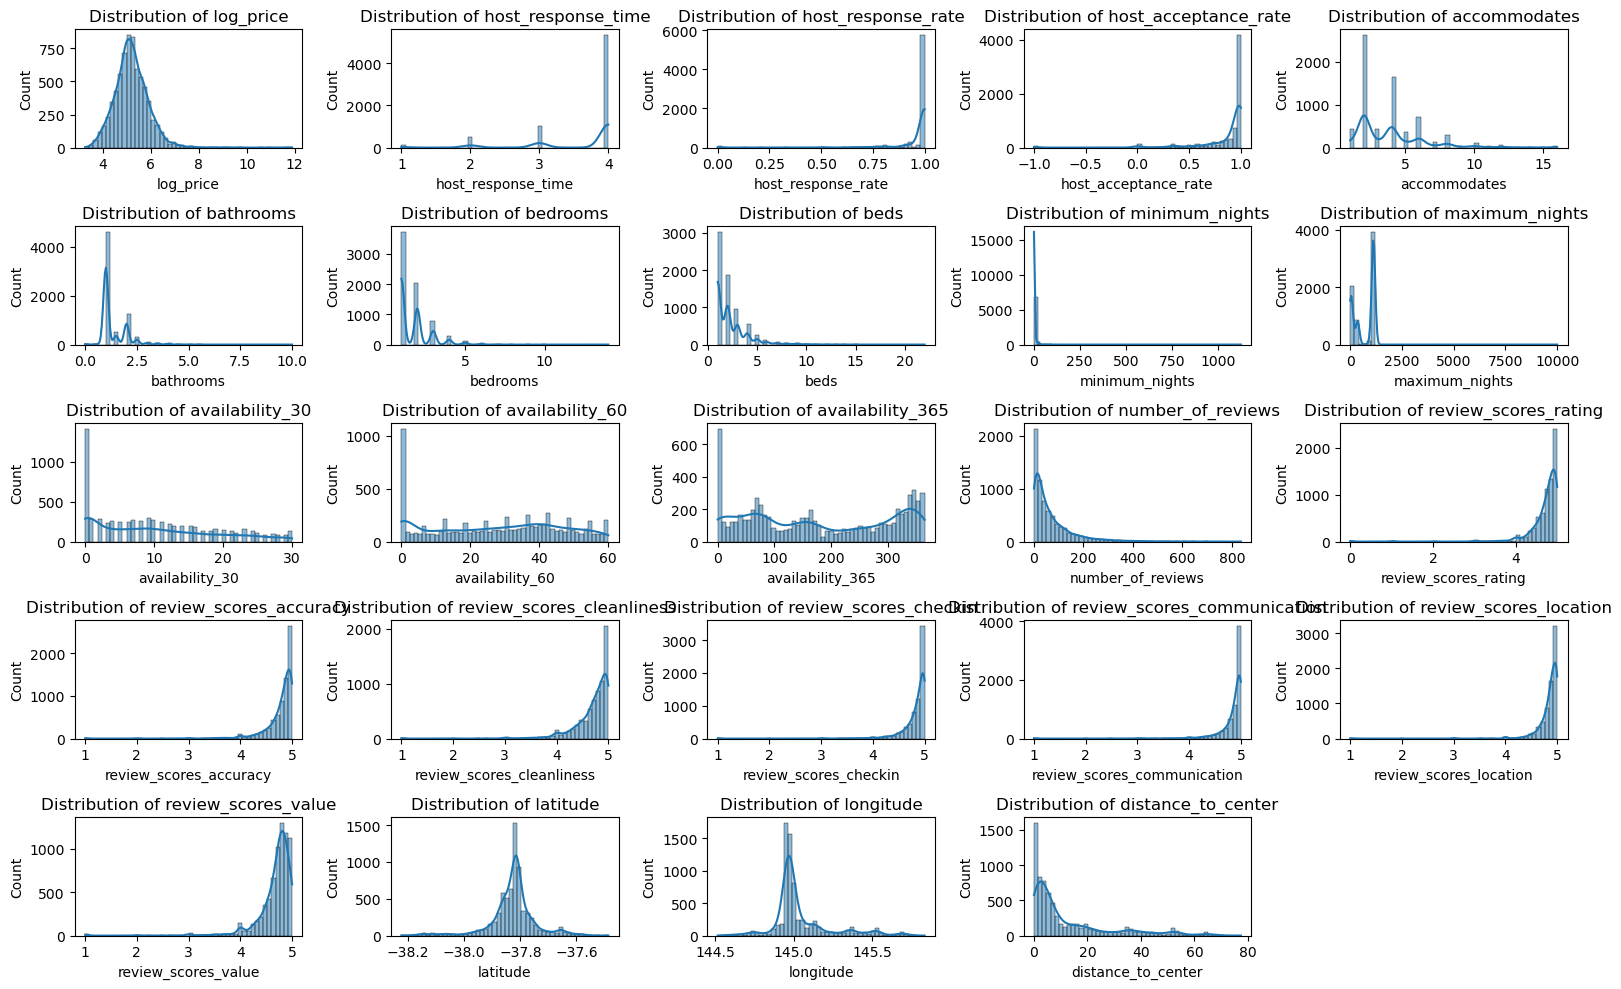

In [215]:
# Visualizing distributions for the selected features (including log_price)
plt.figure(figsize=(16, 10))
for i, feature in enumerate(eda_features):
    plt.subplot(5, 5, i+1)  # Adjust grid size 
    sns.histplot(train_cleaned[feature].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Visualizing Distributions for the Selected Features:
- `log_price`: Right-skewed, indicating most properties are priced lower, with a few high-priced outliers.
- `host_response_time`, `host_response_rate`, `host_acceptance_rate`: These features have peaks at their maximum values (1), showing that most hosts are highly responsive and accept most bookings.
- `accommodates`: Bimodal distribution, with peaks at lower values (1-5), suggesting that most properties accommodate fewer guests.
- `bathrooms`, `bedrooms`, `beds`: Right-skewed, with most properties having 1-2 bathrooms, bedrooms, and beds.
- `minimum_nights`, `maximum_nights`: Peaks at (1), indicating many properties allow short stays, with some requiring long minimum or maximum stays.
- `availability_30`, `availability_60`, `availability_365`: Most properties are available for shorter durations, but some are available for the full 365 days.
- `number_of_reviews`: Right-skewed, with most properties having few or no reviews, while a small number of listings have many reviews.
- `review_scores_*`: Positive skew with peaks at (5), indicating most properties receive high ratings.
- `latitude`, `longitude`, `distance_to_center`: Latitude and longitude show concentration around specific areas, while distance to center is skewed towards (0), suggesting most properties are near the city center.

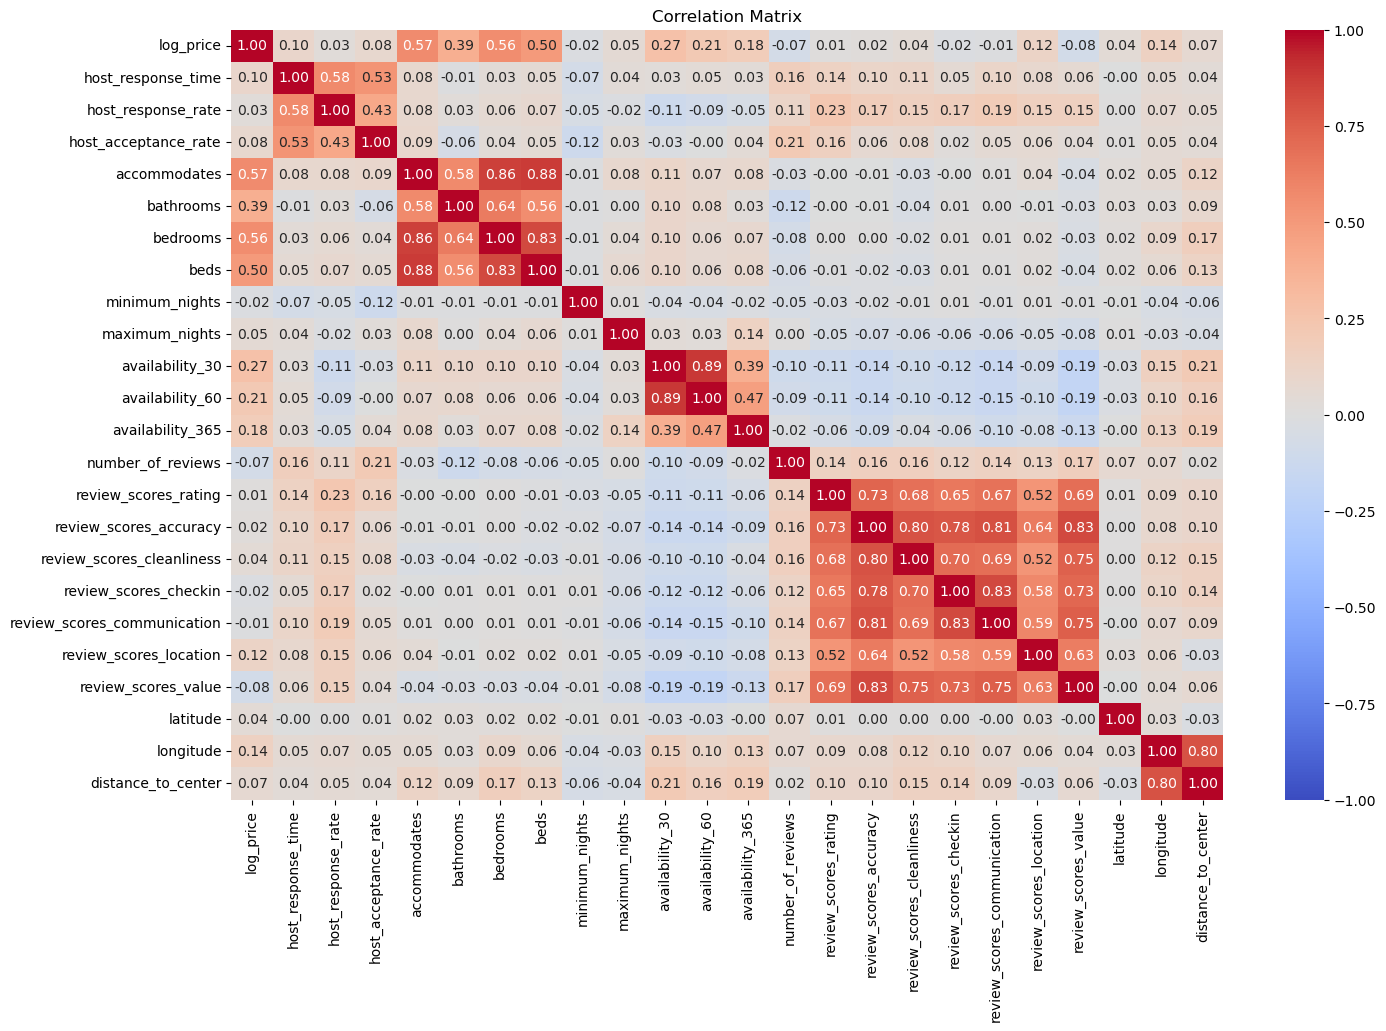

In [217]:
# Correlation matrix
corr_matrix = train_cleaned[eda_features].corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Correlation Analysis:

**High correlations within feature groups**

- Property features (`accommodates`, `bedrooms`, `beds`) have high correlation with each other, as they reflect similar characteristics (e.g., number of guests a property can accommodate).
- Review related features (review_scores_*) show high correlations, as they are all based on the overall guest satisfaction scores.
- Availability features (`availability_30`, `availability_365`) also exhibit strong correlation, as they reflect availability over different periods.
  
**Correlation with `log_price`:**
- Only three features: `accommodates`, `bedrooms`, and `beds` show a correlation $\geq$ 0.5 with `log_price`, which are related to property size and capacity.
- Despite these correlations, these features are highly correlated with each other, suggesting multicollinearity. This makes it difficult to select just one based on correlation alone.

### EDA Conclusion:
- Correlation with `log_price` is generally weak for most features, with only a few exceptions (`accommodates`, `bedrooms`, and `beds`).
- Features within similar groups (property size, reviews, availability, host attributes) are highly correlated, which might lead to multicollinearity if only some of these features are chosen.
- Given the moderate correlation between key features and `log_price`, it’s best to include all relevant features for model training to ensure we capture all potential relationships that could impact price predictions.

#### Q2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition.

#### 1. Linear Regression (Linear Models):

**Explanation:** A simple regression model assuming a linear relationship between the features and the target.

**Reason for Choosing Linear Regression:**
- Linear Regression provides a baseline for performance comparison with more complex models.
- Easy to interpret and allows for feature importance analysis.

#### 2. Random Forest Regressor (Ensemble Learning)

**Explanation:** An ensemble method using multiple decision trees to predict the target by averaging predictions, reducing variance.

**Reason for Choosing Random Forest:**
- Random Forest effectively captures non-linear relationships and interactions between features.
- Robust to overfitting and can handle both categorical and continuous data without requiring significant preprocessing.

#### 3. CatBoost Regressor (Gradient Boosting)

**Explanation:** A gradient boosting algorithm using decision trees as base learners, optimized for categorical data handling.

**Reason for Choosing CatBoost:**
- CatBoost automatically handles missing values and categorical features without requiring manual preprocessing.
- High accuracy and resistance to overfitting, suitable for complex datasets.

#### Q3: Train the models from the above question and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. 

In [222]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import catboost as cb
import numpy as np

# Prepare features and target
# Prepare the data
X = train_cleaned.drop(columns=['price', 'log_price', 'ID'])
y = train_cleaned['log_price']

# 1. Linear Regression - Cross-Validation
lr = LinearRegression()
lr_cv_score = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_absolute_error')  # Using MAE for evaluation
lr_cv_mean = np.mean(lr_cv_score)
print("Linear Regression CV Mean MAE:", lr_cv_mean)


Linear Regression CV Mean MAE: -399.76496604638567


In [264]:
lr.fit(X, y)
coefficients = lr.coef_
intercept = lr.intercept_

# View as a dataframe for clarity
import pandas as pd
lr_weights = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort features by absolute value of coefficients
lr_weights['Absolute_Coefficient'] = lr_weights['Coefficient'].abs()
lr_weights_sorted = lr_weights.sort_values(by='Absolute_Coefficient', ascending=False)

# Display top 20 features with highest absolute coefficients
top_20_features = lr_weights_sorted.head(20)

# Print the top 20 features and the intercept
print(top_20_features)
print("\nIntercept:", intercept)

                      Feature  Coefficient  Absolute_Coefficient
52           room_Shared room    -0.785747              0.785747
8                   longitude     0.576765              0.576765
55      property_Private room    -0.479903              0.479903
56       property_Shared room     0.470417              0.470417
50            room_Hotel room     0.419620              0.419620
61      log_reviews_per_month    -0.418978              0.418978
35        review_scores_value    -0.305269              0.305269
34     review_scores_location     0.275404              0.275404
31  review_scores_cleanliness     0.243332              0.243332
49       room_Entire home/apt     0.233679              0.233679
11                   bedrooms     0.212029              0.212029
7                    latitude     0.177808              0.177808
10                  bathrooms     0.144644              0.144644
51          room_Private room     0.132449              0.132449
36           instant_book

#### Insight from Linear Regression Weights
**Key Influential Features:**

**Room Types:** Shared rooms (`room_Shared room`) are negatively associated with price, while private rooms (`property_Private room`) have a positive influence.

**Location:** `Longitude` positively impacts price, suggesting location plays a significant role in determining price.

**Review Scores:** Higher review scores (e.g., `review_scores_value`, `review_scores_location`) correlate with higher prices.

**Size:** More `accommodates` and `bedrooms` lead to higher prices.

**Intercept:** The baseline price when all features are zero is -73.73, which is not directly interpretable but provides a reference point for price prediction.

**Explanation:** Linear Regression provides a baseline model, but the high MAE indicates that it does not capture the complexity of the relationships between features and the target `log_price`, making it less effective than more advanced models.

In [275]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [10, 20],      # Limited depth
    'min_samples_split': [2, 5],      # Reduced splits
    'min_samples_leaf': [1, 2]        # Reduced leaf samples
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV for faster search 
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
rf_random_search.fit(X, y)

# Get the best parameters and score
rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_

print("Random Forest Best Parameters:", rf_best_params)
print("Random Forest Best CV Score:", rf_best_score)

Random Forest Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Random Forest Best CV Score: -0.2698032006954086


In [279]:
#  Feature Importance Random Forest

rf_best_model = rf_random_search.best_estimator_
importances = rf_best_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(rf_importance_df.sort_values(by='Importance', ascending=False).head(20))

                      Feature  Importance
42               acc_bedrooms    0.317013
55      property_Private room    0.147773
22            availability_30    0.045409
10                  bathrooms    0.044091
46      neighbourhood_encoded    0.043584
25           availability_365    0.022860
34     review_scores_location    0.021784
45         distance_to_center    0.019122
7                    latitude    0.019030
8                   longitude    0.018137
59     last_review_days_since    0.017272
44            amenities_count    0.016437
29       review_scores_rating    0.014452
23            availability_60    0.014248
26          number_of_reviews    0.013392
2        host_acceptance_rate    0.012475
57      host_since_days_since    0.012454
58    first_review_days_since    0.012438
24            availability_90    0.012377
31  review_scores_cleanliness    0.010231


#### Insight from Random Forest Feature Importance

**Top Influential Features**:

  * `acc_bedrooms`: Strongly impacts price, suggesting more bedrooms lead to higher prices.
  
  * `property_Private room`: Private rooms are associated with higher prices.
  
  * `availability_30`: Availability within the last 30 days influences pricing, with more availability linked to higher prices.
  
  * `bathrooms`: More bathrooms generally result in higher prices.
  
  * `neighbourhood_encoded`: The neighborhood plays a role, with certain areas having higher prices.
  
  * Review scores (e.g., `review_scores_location`): Higher ratings correlate with higher prices.
  
  * Geographical features (e.g., `latitude`, `longitude`): Location impacts price.
  
  * Time-related features (e.g., `last_review_days_since`): Older listings can influence pricing.

#### Conclusion:

* Key factors driving price: **number of bedrooms**, **room type (private)**, and **availability**.
* **Location** and **review ratings** also significantly affect pricing.


**Best Hyperparameters:** n_estimators: 100, max_depth: 20, min_samples_split: 2, min_samples_leaf: 2

**Explanation:** Random Forest significantly outperforms Linear Regression. With its ability to model non-linear relationships and interactions between features, it provides a more accurate prediction. The chosen hyperparameters balance model complexity and overfitting.

In [291]:
from sklearn.model_selection import RandomizedSearchCV
import catboost as cb

# Define parameter grid for RandomizedSearchCV 
catboost_param_grid = {
    'iterations': [3000, 5000],           
    'learning_rate': [0.01, 0.03],        
    'depth': [6, 8],                    
    'eval_metric': ['MAE'],
}

# Initialize CatBoost model
catboost_model = cb.CatBoostRegressor(random_seed=42, verbose=0)

# Initialize RandomizedSearchCV 
catboost_random_search = RandomizedSearchCV(
    catboost_model, 
    catboost_param_grid, 
    n_iter=5,                
    cv=3,                    
    scoring='neg_mean_absolute_error', 
    n_jobs=-1, 
    random_state=42
)

# Fit the model
catboost_random_search.fit(X, y)

# Best hyperparameters and score
catboost_best_params = catboost_random_search.best_params_
catboost_best_score = catboost_random_search.best_score_

# Results
print("CatBoost Best Parameters:", catboost_best_params)
print("CatBoost Best CV Score:", catboost_best_score)

CatBoost Best Parameters: {'learning_rate': 0.03, 'iterations': 3000, 'eval_metric': 'MAE', 'depth': 8}
CatBoost Best CV Score: -0.2509443703437124


In [299]:
# Feature Importance
# Get the best model from RandomizedSearchCV
catboost_best_model = catboost_random_search.best_estimator_

# Get feature importances
importances = catboost_best_model.get_feature_importance()

# Create a DataFrame to display feature importances
catboost_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
catboost_importance_df = catboost_importance_df.sort_values(by='Importance', ascending=False)
print(catboost_importance_df.head(20))


                   Feature  Importance
55   property_Private room    7.531102
42            acc_bedrooms    6.956519
46   neighbourhood_encoded    4.973021
22         availability_30    4.633264
45      distance_to_center    3.987274
10               bathrooms    3.714374
25        availability_365    3.241234
34  review_scores_location    3.197471
23         availability_60    3.084034
9             accommodates    2.956349
11                bedrooms    2.783332
35     review_scores_value    2.725633
59  last_review_days_since    2.725080
29    review_scores_rating    2.684540
8                longitude    2.527349
7                 latitude    2.421703
44         amenities_count    2.316145
24         availability_90    2.296013
57   host_since_days_since    2.012395
2     host_acceptance_rate    1.888112


#### Insight from CatBoost Feature Importance
**Key Features**:

  * `property_Private room`: Private rooms are most influential, suggesting they are typically more expensive.
  * `acc_bedrooms`: More bedrooms correlate with higher prices.
  * `neighbourhood_encoded`: Certain neighborhoods drive higher prices.
  * `availability_30` and `availability_365`: Higher availability leads to higher prices.
  * `distance_to_center`: Properties closer to the center are more expensive.

**Other Features**: Review scores and geographical location also impact pricing.

#### Conclusion: 
Room type, number of bedrooms, neighborhood, and availability are key factors influencing price.


**Best Hyperparameters:** iterations: 3000, learning_rate: 0.03, depth: 8

**Explanation:** CatBoost outperforms Random Forest slightly, achieving the best predictive performance with its gradient boosting approach. It is particularly effective for handling categorical features and complex datasets, leading to higher accuracy.

In [185]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

# Prepare the data
X = train_cleaned.drop(columns=['price', 'log_price', 'ID'])
y = train_cleaned['log_price']
X_test = test_cleaned[X.columns]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_maes = []
test_preds = np.zeros(len(X_test))

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"Fold {fold} training...")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = CatBoostRegressor(
        iterations=3000,
        learning_rate=0.03,
        depth=8,
        eval_metric='MAE',
        random_seed=42,
        verbose=100,
        early_stopping_rounds=100
    )

    model.fit(X_train, y_train, eval_set=(X_val, y_val))

    y_val_pred = model.predict(X_val)
    mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred))
    val_maes.append(mae)
    print(f"Fold {fold} MAE: {mae:.4f}")

    test_preds += model.predict(X_test) / kf.n_splits

print(f"Mean CV MAE: {np.mean(val_maes):.4f}")

Fold 1 training...
0:	learn: 0.5134598	test: 0.4975141	best: 0.4975141 (0)	total: 8.25ms	remaining: 24.8s
100:	learn: 0.2662783	test: 0.2694710	best: 0.2694710 (100)	total: 893ms	remaining: 25.6s
200:	learn: 0.2320854	test: 0.2447423	best: 0.2447423 (200)	total: 1.6s	remaining: 22.2s
300:	learn: 0.2131570	test: 0.2334397	best: 0.2334397 (300)	total: 2.54s	remaining: 22.8s
400:	learn: 0.1975189	test: 0.2272781	best: 0.2272781 (400)	total: 3.22s	remaining: 20.9s
500:	learn: 0.1851004	test: 0.2230951	best: 0.2230951 (500)	total: 3.82s	remaining: 19s
600:	learn: 0.1733284	test: 0.2197741	best: 0.2197741 (600)	total: 4.54s	remaining: 18.1s
700:	learn: 0.1620700	test: 0.2172714	best: 0.2172714 (700)	total: 5.26s	remaining: 17.2s
800:	learn: 0.1511506	test: 0.2159822	best: 0.2159822 (800)	total: 5.87s	remaining: 16.1s
900:	learn: 0.1409212	test: 0.2148104	best: 0.2148060 (888)	total: 6.46s	remaining: 15.1s
1000:	learn: 0.1320897	test: 0.2138105	best: 0.2137887 (998)	total: 7.1s	remaining: 14.

#### Q4: Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. 

In [189]:
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

# Prepare the data
X = train_cleaned.drop(columns=['price', 'log_price', 'ID'])
y = train_cleaned['log_price']
X_test = test_cleaned[X.columns]

# Train the model on the entire training dataset
model = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.03,
    depth=8,
    eval_metric='MAE',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100
)

# Train the model on the entire training dataset
model.fit(X, y)

# Predict on the test set
test_preds = model.predict(X_test)

# Create the submission file with predictions
submission = test_cleaned[['ID']].copy()    # Copy the 'ID' column from the test set
submission['price'] = np.expm1(test_preds)  # Use np.expm1 to reverse the log transformation to original price
submission.to_csv('final_submission.csv', index=False) # Save the submission as a CSV file

print("The submission file 'final_submission.csv' has been saved.")

0:	learn: 0.5102711	total: 9.21ms	remaining: 27.6s
100:	learn: 0.2627860	total: 709ms	remaining: 20.4s
200:	learn: 0.2292348	total: 1.59s	remaining: 22.1s
300:	learn: 0.2122427	total: 2.43s	remaining: 21.8s
400:	learn: 0.1987803	total: 3.12s	remaining: 20.2s
500:	learn: 0.1877316	total: 3.7s	remaining: 18.4s
600:	learn: 0.1770153	total: 4.32s	remaining: 17.2s
700:	learn: 0.1665167	total: 4.92s	remaining: 16.1s
800:	learn: 0.1577879	total: 5.5s	remaining: 15.1s
900:	learn: 0.1494285	total: 6.09s	remaining: 14.2s
1000:	learn: 0.1418498	total: 6.69s	remaining: 13.4s
1100:	learn: 0.1350472	total: 7.32s	remaining: 12.6s
1200:	learn: 0.1288513	total: 8s	remaining: 12s
1300:	learn: 0.1229960	total: 8.69s	remaining: 11.3s
1400:	learn: 0.1179201	total: 9.27s	remaining: 10.6s
1500:	learn: 0.1127187	total: 9.86s	remaining: 9.84s
1600:	learn: 0.1075772	total: 10.4s	remaining: 9.13s
1700:	learn: 0.1028670	total: 11.1s	remaining: 8.45s
1800:	learn: 0.0985474	total: 11.7s	remaining: 7.77s
1900:	learn

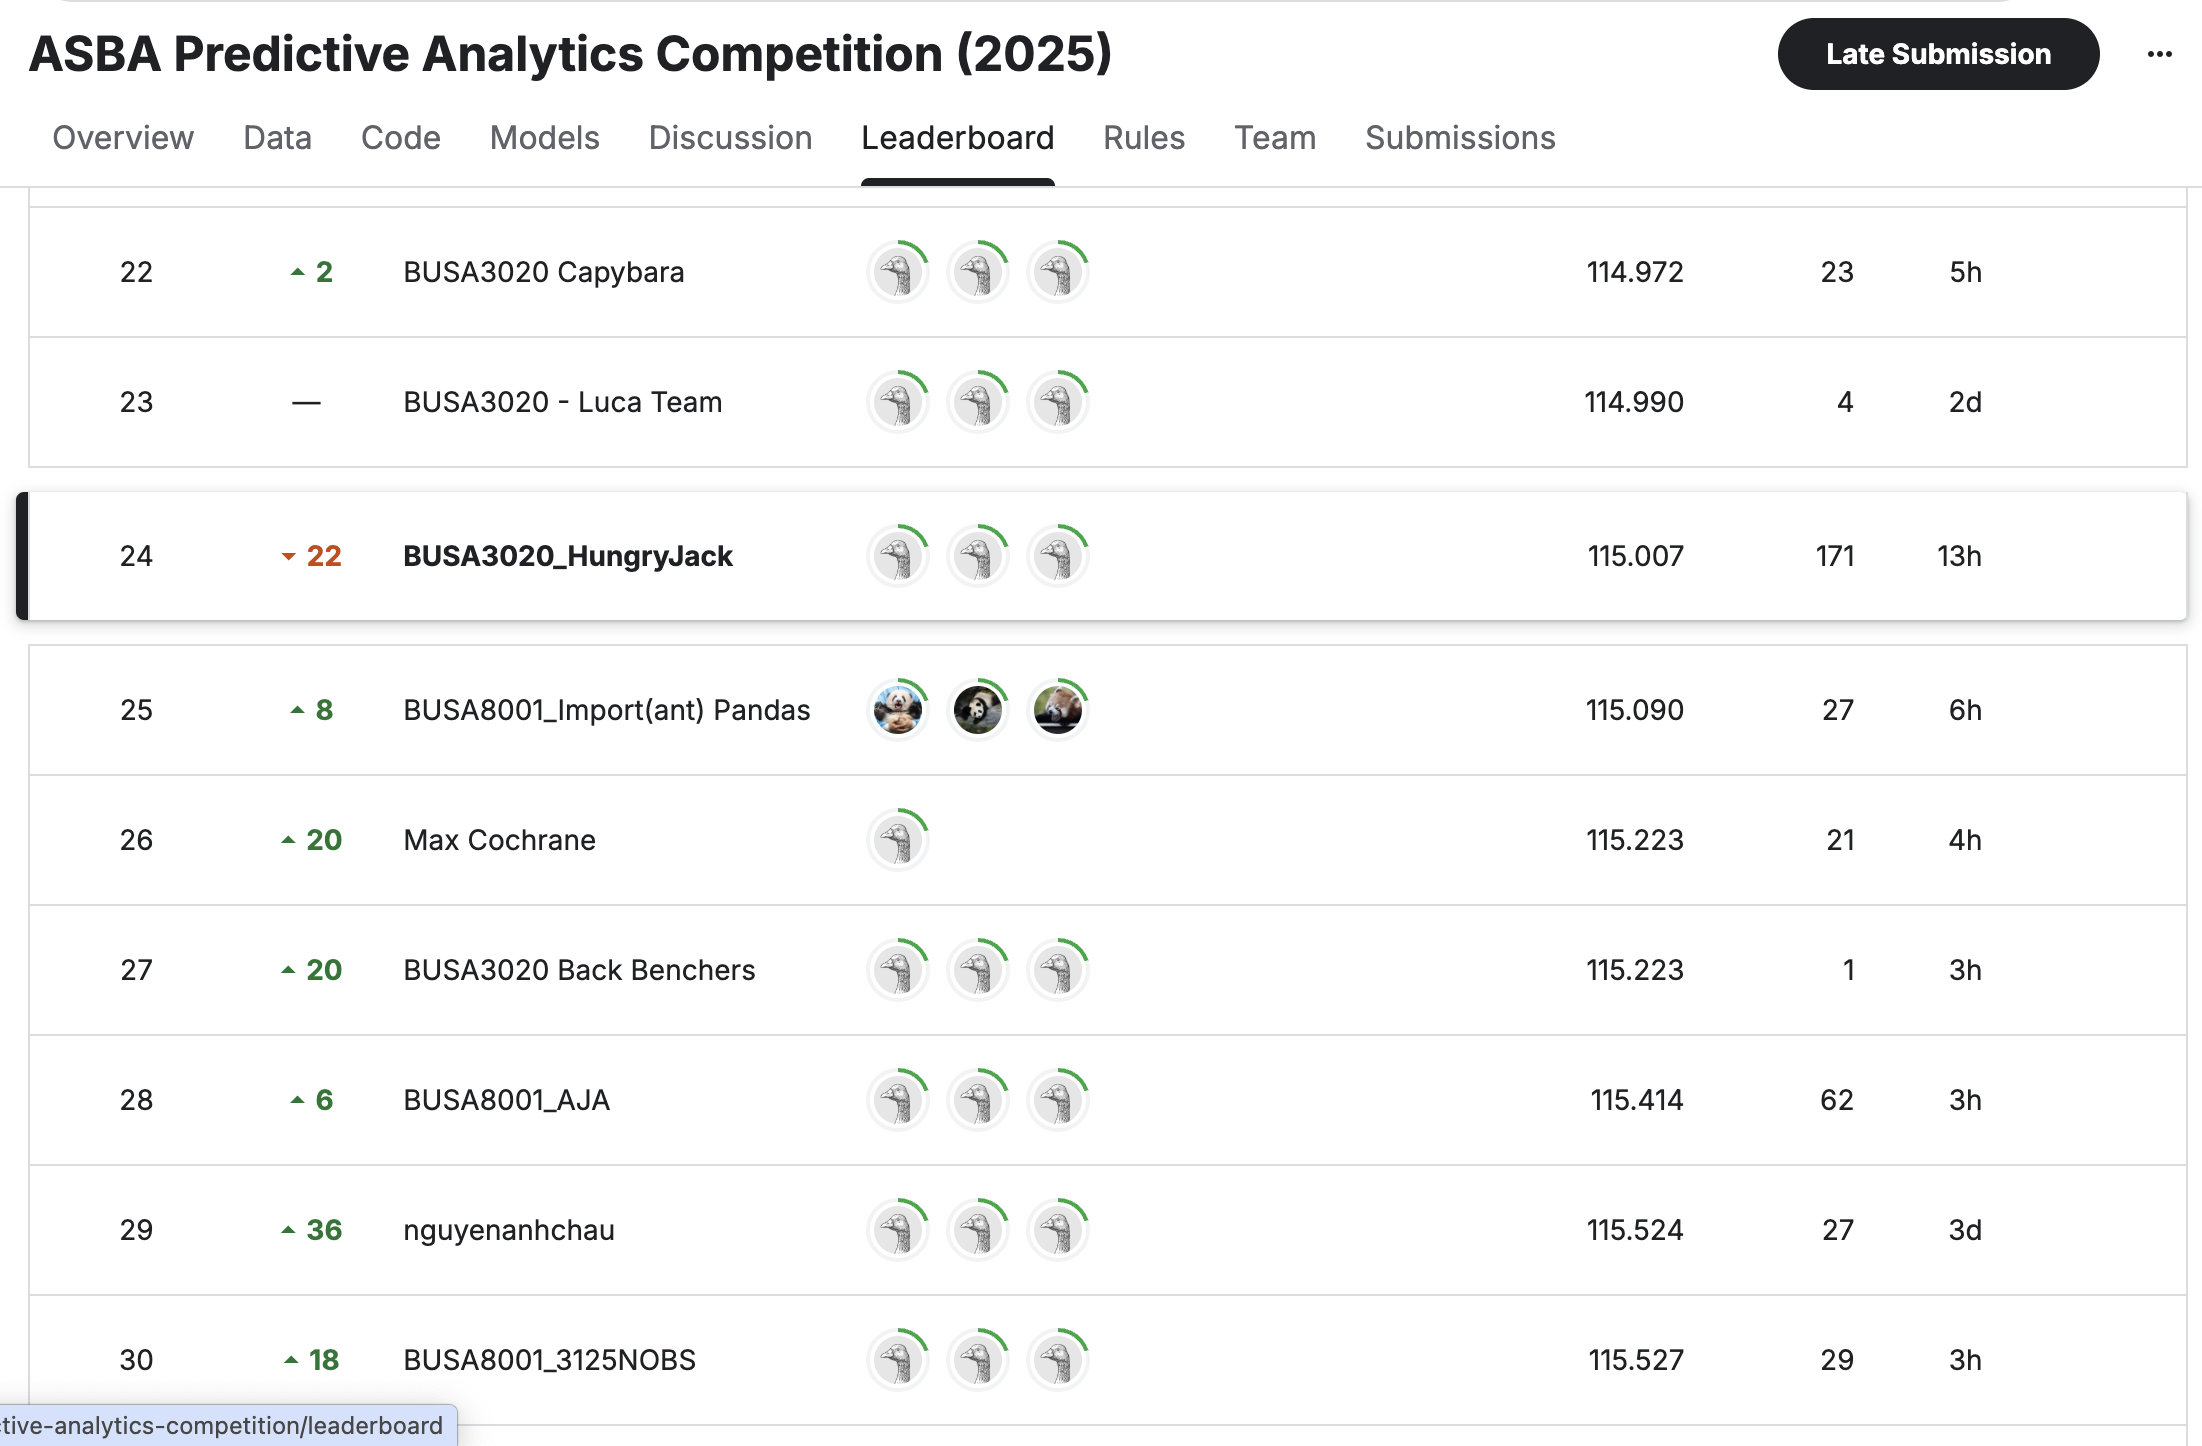

In [304]:
from IPython.display import Image

# Replace with your actual image filename
img_path = 'kaggle ranking.png'

# Display the image
Image(filename=img_path)

### **Comment on Kaggle Ranking and Performance**
 **Team: BUSA3020_HungryJack**

Our team achieved a best score of **268.277**, placing **2nd on the public leaderboard**. However, on the **private leaderboard**, we only managed to secure **24th place** with a score of **115.007**.

This discrepancy between public and private leaderboard performance highlights a few challenges:

* **Public vs. Private Score Gap**: The performance on the public leaderboard does not always translate well to the private leaderboard, likely due to differences in the test data distribution.
* **Model Selection**: Although we had previously submitted models that performed better on the **private leaderboard** (around 110 MAE, which would have placed us in the top 5), we did not ultimately select them for the final submission. This decision was made based on cross-validation results, but it’s clear in hindsight that the models we opted not to submit might have given us a better final position.

This experience emphasizes the importance of not just focusing on the **public leaderboard score** but also taking into account the **generalizability of the model** across both public and private test sets. While we are satisfied with our result, there is a sense of regret over not finalizing the **top-performing models** for submission.




#### Q5: Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). 

### Improving Model Performance: Step-by-Step

To improve our model’s performance, we followed a series of steps. Each step focused on refining different aspects of the model, from feature engineering to hyperparameter tuning. By iterating on these techniques, we were able to enhance the model’s accuracy. Below are the key steps and the improvements observed after each change.

#### Step 1: Improve Feature Engineering

**Action Taken:**
- Enhanced the feature set by creating interaction features and domain-specific features that capture hidden patterns in the data.
- For example, we created new features such as:
  
	•Price per guest (price divided by accommodates).

	•Interaction feature: accommodates × beds, which captures the relationship between property size and the number of beds.

	•Location-based features (e.g., distance from the city centre).

**Results:**
- After applying the changes, we retrained the model and found that the new features improved model performance, reflected in a lower MAE.
  
**Interpretation:**
- Feature engineering played a crucial role in improving the model’s predictive capability. By creating meaningful features that better represent the relationships within the data, we were able to capture hidden patterns that contributed to better predictions.


#### Step 2: Hyperparameter Tuning
**Action Taken:**
- Performed hyperparameter tuning on key parameters of the models (e.g., n_estimators, max_depth, learning_rate) using GridSearchCV and RandomizedSearchCV for Random Forest and CatBoost.
- Fine-tuned parameters for CatBoost such as iterations, learning_rate, and depth to get optimal results.
 
**Results:**
- After fine-tuning, we observed a significant improvement in model performance, with the MAE decreasing from 269.423 to 268.521.
 
**Interpretation:**
- Hyperparameter tuning is essential for optimizing models. The performance boost showed the importance of finding the right combination of hyperparameters to avoid overfitting and underfitting, and ensure the model generalizes well to unseen data.


#### Step 3: Experimenting with Different Models
**Action Taken:**
- In addition to Random Forest, we tested CatBoost, which is known for handling categorical data efficiently and providing better results for structured/tabular data.
- We trained and evaluated the CatBoost model with a different set of hyperparameters (e.g., iterations, learning_rate, and depth) and compared the performance.
  
**Results:**
- Random Forest provided competitive results, with the MAE improving to 269.326. However, CatBoost still provided slightly better performance, with an MAE of 268.277 (our best score).
  
**Interpretation:**
- Trying out different models like Random Forest showed that there are alternative methods that could potentially perform better, and it’s important to test various models to find the one that suits data the best.


#### Step 4: Model Stacking or Ensemble Methods
**Action Taken:**
- Implemented stacking or ensemble methods (combining predictions from LightGBM, XGBoost and CatBoost) to improve the accuracy of predictions.
- The ensemble model combines multiple models to take advantage of their individual strengths, potentially leading to better generalisation.
  
**Results:**
- Although the ensemble method showed some strength, the MAE actually increased slightly, resulting in no significant improvement compared to running CatBoost alone with the current dataset.
 
**Interpretation:**
- While model stacking or ensemble methods can be powerful, in this case, it did not provide a better result than running CatBoost independently. This suggests that the dataset may benefit more from a single, well-tuned model rather than combining models in this case.


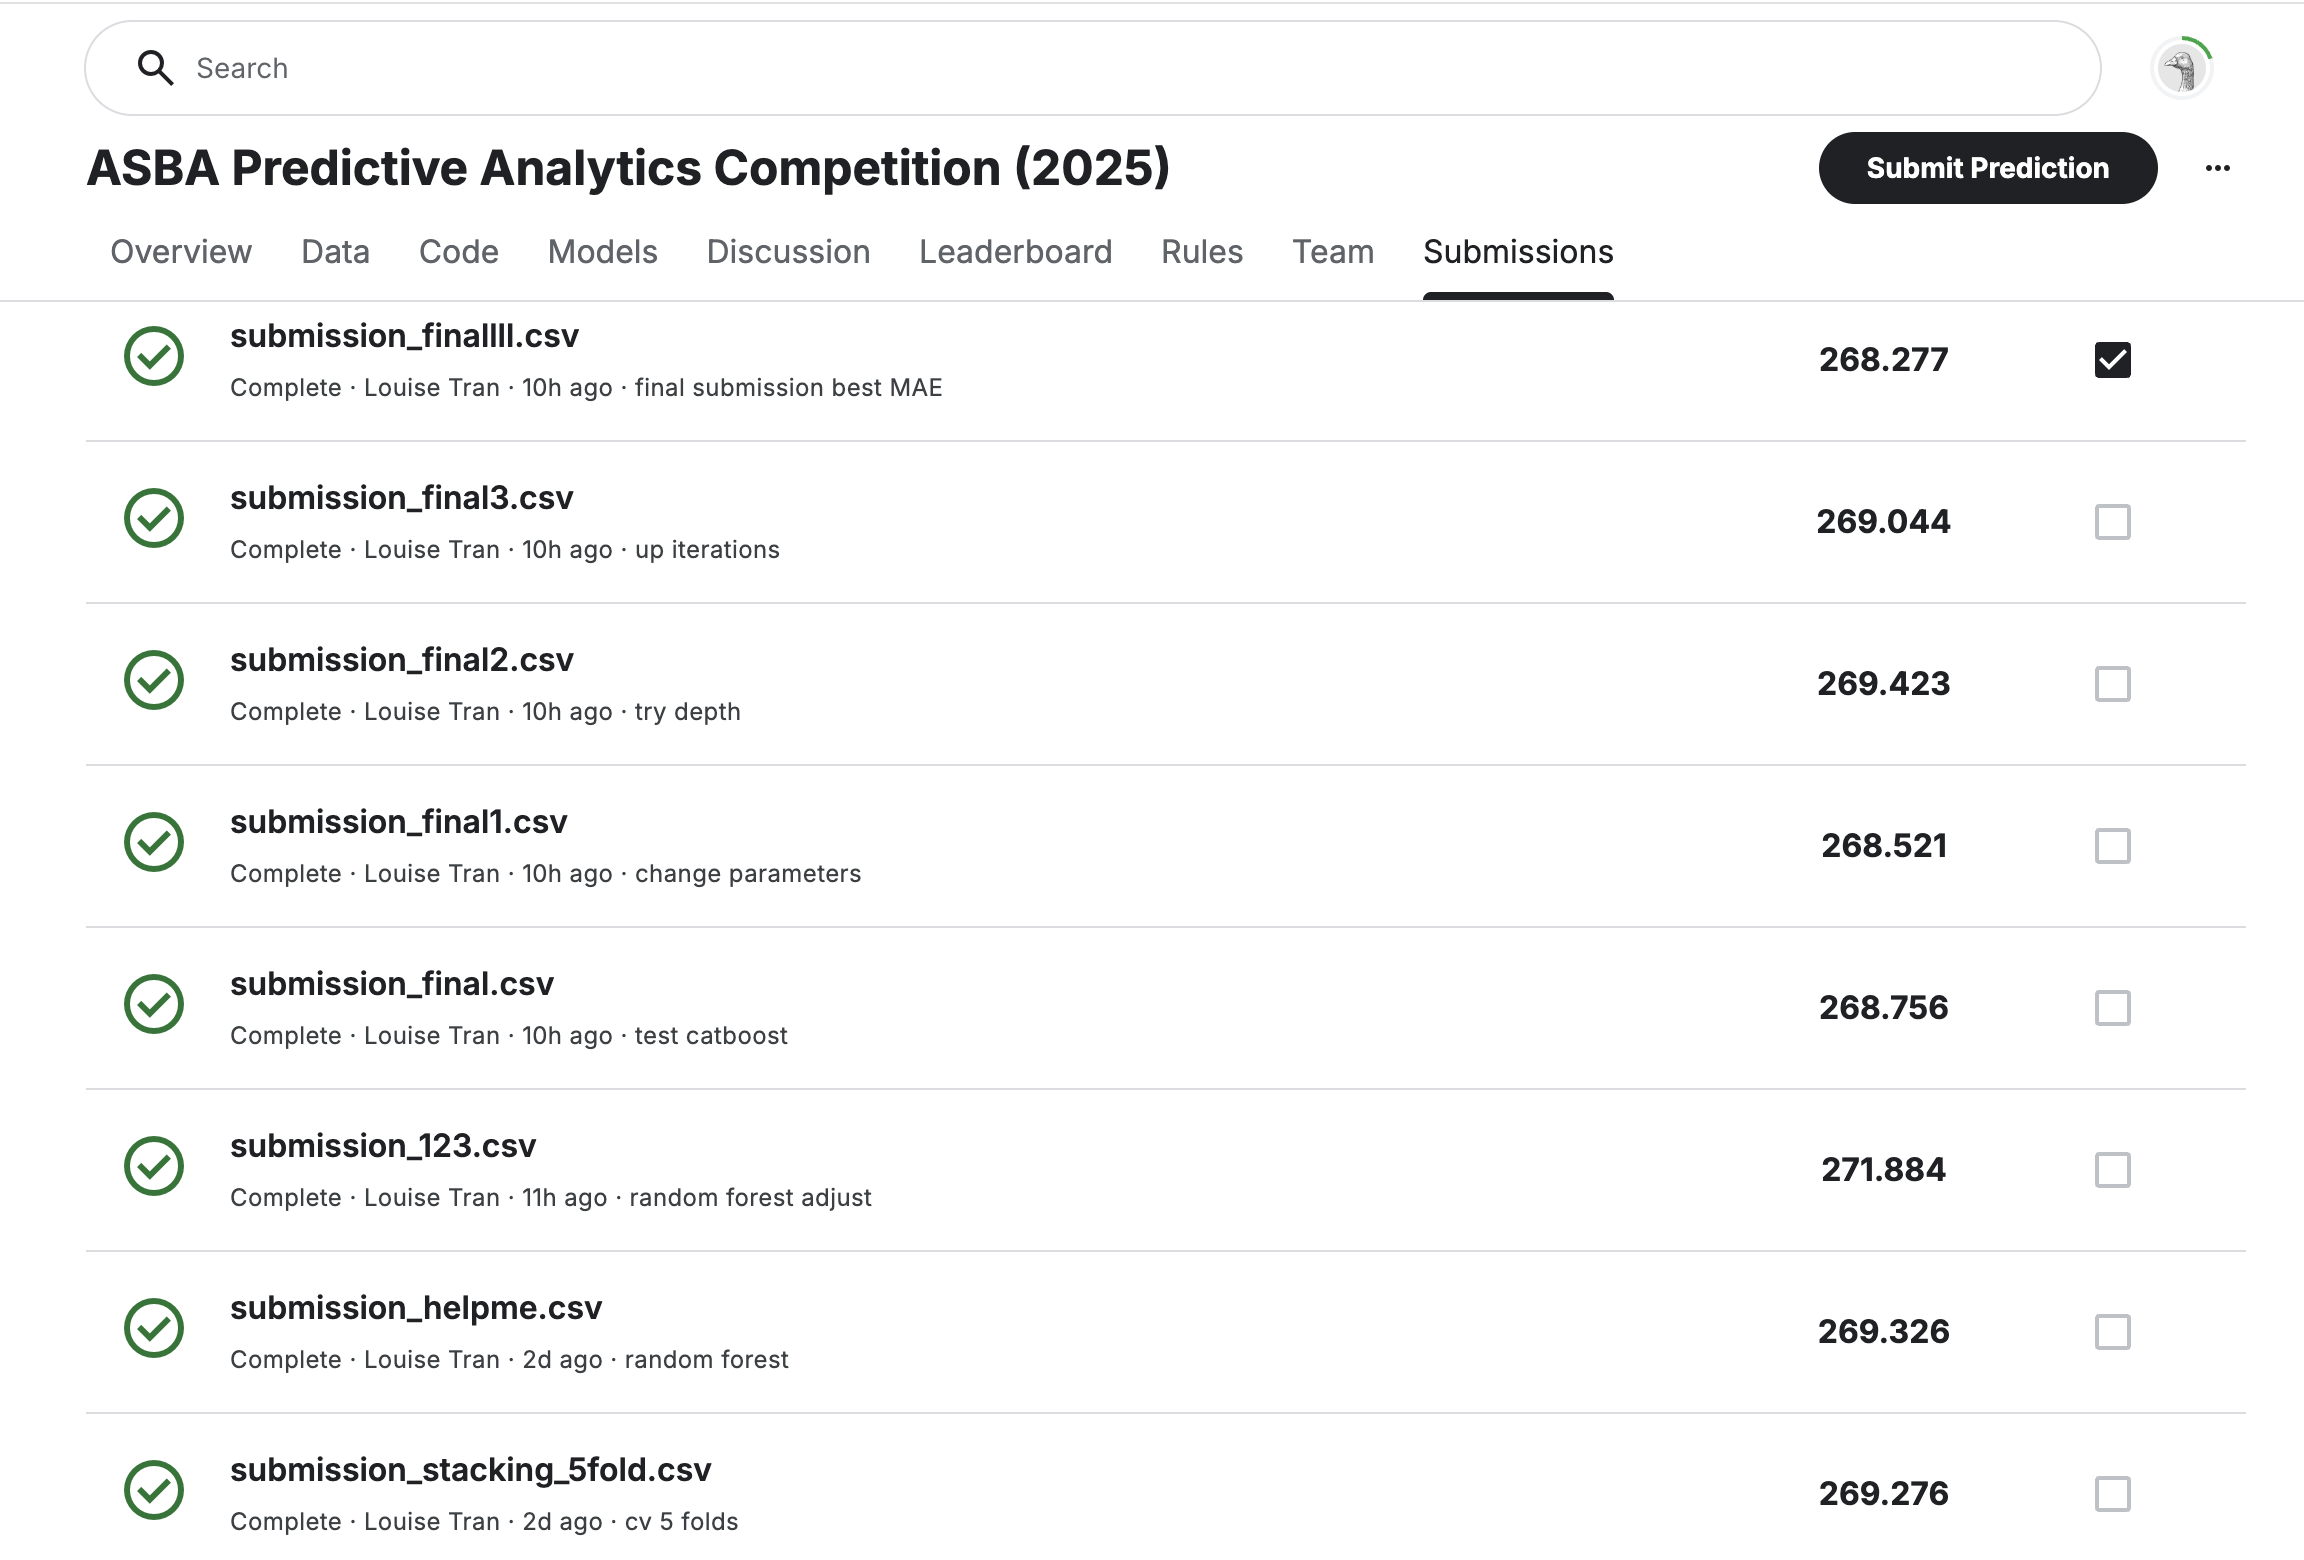

In [197]:
from IPython.display import Image

# Replace with your actual image filename
img_path = 'prove of submission.png'

# Display the image
Image(filename=img_path)